# Práctica 2

### General

In [1]:
# Carga de librerías necesarias
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from random import random

from IPython.display import display


from colorama import Fore, Back, Style # Colores en el output

In [24]:
def Title(msg):
    return Style.BRIGHT + Fore.BLACK + Back.WHITE + msg + Style.RESET_ALL

def Error(msg):
    return Style.BRIGHT + Fore.RED + msg + Style.RESET_ALL

### Ejercicio 1

Pruebe ahora a repetir el mismo proceso, pero con los datos de interpolación  
- $(a-h,f(a-h))$ y $(a,f(a))$,
- $(a-h,f(a-h))$ y $(a+h,f(a+h))$. 
  
 ¿Qué fórmulas de derivación numérica se obtiene en cada caso?

In [3]:
# Creamos la función simbólica
f = sp.Function('f')
a, h, x = sp.symbols('a,h,x') # a, h, x como variables simbólicas

In [4]:
def polinomio_interpolacion(x_values, y_values):
    """
    Devuelve el polinomio de interpolación para 2 nodos
    x_values: Nodos 
    y_values: Imágenes de los nodos
    """
    return (y_values[1]-y_values[0])/(x_values[1]-x_values[0])*(x-x_values[0])+y_values[0]

#### Apartado 1

In [5]:
# Definimos los valores y sus imagenes
x_values = [a-h,a]
y_values = [f(x_values[0]),f(x_values[1])]

# Calculamos el polinomio de interpolación
p = polinomio_interpolacion(x_values, y_values)

# Derivamos el polinomio de interpolación
p_der = sp.diff(p,x)

# Mostramos los resultados
print(Title(f"Aproximación de la derivada para los nodos ({x_values[0]}, {y_values[0]}) y ({x_values[1]}, {y_values[1]}):"))
print(f"L(f)≡ f'(a) ≈ p'(a) = ")
display(p_der)
print(f"donde p (el polinomio de interpolación) es")
display(p)

Aproximación de la derivada para los nodos (a - h, f(a - h)) y (a, f(a)):
L(f)≡ f'(a) ≈ p'(a) = 


(f(a) - f(a - h))/h

donde p (el polinomio de interpolación) es


f(a - h) + (f(a) - f(a - h))*(-a + h + x)/h

#### Apartado 2

In [6]:
# Definimos los valores y sus imagenes
x_values = [a-h,a+h]
y_values = [f(x_values[0]),f(x_values[1])]

# Calculamos el polinomio de interpolación
p = polinomio_interpolacion(x_values, y_values)

# Derivamos el polinomio de interpolación
p_der = sp.diff(p,x)

# Mostramos los resultados
print(Title(f"Aproximación de la derivada para los nodos ({x_values[0]}, {y_values[0]}) y ({x_values[1]}, {y_values[1]}):"))
print(f"L(f)≡ f'(a) ≈ p'(a) = ")
display(p_der)
print(f"donde p (el polinomio de interpolación) es")
display(p)

Aproximación de la derivada para los nodos (a - h, f(a - h)) y (a + h, f(a + h)):
L(f)≡ f'(a) ≈ p'(a) = 


(-f(a - h) + f(a + h))/(2*h)

donde p (el polinomio de interpolación) es


f(a - h) + (-f(a - h) + f(a + h))*(-a + h + x)/(2*h)

### Ejercicio 2

Codifica una función para calcular la fórmula de derivación de tipo interpolatorio obtenida al derivar el polinomio interpolador en una lista de nodos que acepte como argumento. Añade un argumento opcional que sea el orden de la derivada a calcular. Comprueba el correcto funcionamiento de esta función con los ejemplos mostrados hasta el momento.

In [168]:
from sympy.polys.polyfuncs import interpolate

def formula_derivacion_interpolatorio(x_values, order=1):
	# Creamos la función simbólica
	f = sp.Function('f')
	x = sp.symbols('x') # x como variable simbólica

	y_values = [f(xi) for xi in x_values]
	data = list(zip(x_values, y_values))  # lista de tuplas (x,y) para los nodos de interpolación

	interpolated_poly = interpolate(data, x)

	return sp.diff(interpolated_poly,x,order)


In [8]:
def evaluar_funcion(x_values, order=1):
	""""
	Función que sirve únicamente para evaluar la función formula_derivacion_interpolatorio
	Formatea la salida y devuelve el resultado de la función
	"""
	print(Title(f"Aproximación de la derivada {order}ª para los nodos {x_values} :"))
	formula = formula_derivacion_interpolatorio(x_values, order)
	display(formula.simplify())
	
	return formula

In [9]:
# Probemos la función recién definida

# Voy simplemente a mostrar los resultados. Si quisiese probar otras cosas llamaría directamente a la función formula_derivacion_interpolatorio

# Los nodos del ejercicio anterior
x_values = [a-h,a]
evaluar_funcion(x_values)

x_values = [a-h,a+h]
evaluar_funcion(x_values)

# Probamos con 3 nodos
x_values = [a-h, a, a+h]
evaluar_funcion(x_values)
evaluar_funcion(x_values, 2)

# Con más nodos
x_values = [a-2*h, a-h, a, a+h, a+2*h]
evaluar_funcion(x_values)
funcion = evaluar_funcion(x_values,2)

# Vamos a probar a evaluarla en el punto 'a'
print(Title(f"Evaluación de la fórmula anterior para x=a :"))
display(funcion.subs({x:a}).simplify())

# Más ejemplos
x_values = [a, a+h, a+2*h]
funcion=evaluar_funcion(x_values)
print(Title(f"Evaluación de la fórmula anterior para x=a :"))
display(funcion.subs({x:a}).simplify())

funcion=evaluar_funcion(x_values,2)
print(Title(f"Evaluación de la fórmula anterior para x=a :"))
display(funcion.subs({x:a}).simplify())

Aproximación de la derivada 1ª para los nodos [a - h, a] :


(f(a) - f(a - h))/h

Aproximación de la derivada 1ª para los nodos [a - h, a + h] :


(-f(a - h) + f(a + h))/(2*h)

Aproximación de la derivada 1ª para los nodos [a - h, a, a + h] :


(2*a*f(a) - a*f(a - h) - a*f(a + h) + h*(-f(a - h) + f(a + h))/2 - 2*x*f(a) + x*f(a - h) + x*f(a + h))/h**2

Aproximación de la derivada 2ª para los nodos [a - h, a, a + h] :


(-2*f(a) + f(a - h) + f(a + h))/h**2

Aproximación de la derivada 1ª para los nodos [a - 2*h, a - h, a, a + h, a + 2*h] :


(-12*a**3*f(a) - 2*a**3*f(a - 2*h) + 8*a**3*f(a - h) + 8*a**3*f(a + h) - 2*a**3*f(a + 2*h) + 36*a**2*x*f(a) + 6*a**2*x*f(a - 2*h) - 24*a**2*x*f(a - h) - 24*a**2*x*f(a + h) + 6*a**2*x*f(a + 2*h) - 36*a*x**2*f(a) - 6*a*x**2*f(a - 2*h) + 24*a*x**2*f(a - h) + 24*a*x**2*f(a + h) - 6*a*x**2*f(a + 2*h) + h**3*(f(a - 2*h) - 8*f(a - h) + 8*f(a + h) - f(a + 2*h)) + h**2*(30*a*f(a) + a*f(a - 2*h) - 16*a*f(a - h) - 16*a*f(a + h) + a*f(a + 2*h) - 30*x*f(a) - x*f(a - 2*h) + 16*x*f(a - h) + 16*x*f(a + h) - x*f(a + 2*h)) + 3*h*(-a**2*f(a - 2*h) + 2*a**2*f(a - h) - 2*a**2*f(a + h) + a**2*f(a + 2*h) + 2*a*x*f(a - 2*h) - 4*a*x*f(a - h) + 4*a*x*f(a + h) - 2*a*x*f(a + 2*h) - x**2*f(a - 2*h) + 2*x**2*f(a - h) - 2*x**2*f(a + h) + x**2*f(a + 2*h)) + 12*x**3*f(a) + 2*x**3*f(a - 2*h) - 8*x**3*f(a - h) - 8*x**3*f(a + h) + 2*x**3*f(a + 2*h))/(12*h**4)

Aproximación de la derivada 2ª para los nodos [a - 2*h, a - h, a, a + h, a + 2*h] :


(3*a**2*f(a) + a**2*f(a - 2*h)/2 - 2*a**2*f(a - h) - 2*a**2*f(a + h) + a**2*f(a + 2*h)/2 - 6*a*x*f(a) - a*x*f(a - 2*h) + 4*a*x*f(a - h) + 4*a*x*f(a + h) - a*x*f(a + 2*h) + h**2*(-30*f(a) - f(a - 2*h) + 16*f(a - h) + 16*f(a + h) - f(a + 2*h))/12 + h*(a*f(a - 2*h) - 2*a*f(a - h) + 2*a*f(a + h) - a*f(a + 2*h) - x*f(a - 2*h) + 2*x*f(a - h) - 2*x*f(a + h) + x*f(a + 2*h))/2 + 3*x**2*f(a) + x**2*f(a - 2*h)/2 - 2*x**2*f(a - h) - 2*x**2*f(a + h) + x**2*f(a + 2*h)/2)/h**4

Evaluación de la fórmula anterior para x=a :


(-30*f(a) - f(a - 2*h) + 16*f(a - h) + 16*f(a + h) - f(a + 2*h))/(12*h**2)

Aproximación de la derivada 1ª para los nodos [a, a + h, a + 2*h] :


(-a*f(a) + 2*a*f(a + h) - a*f(a + 2*h) + h*(-3*f(a) + 4*f(a + h) - f(a + 2*h))/2 + x*f(a) - 2*x*f(a + h) + x*f(a + 2*h))/h**2

Evaluación de la fórmula anterior para x=a :


(-3*f(a) + 4*f(a + h) - f(a + 2*h))/(2*h)

Aproximación de la derivada 2ª para los nodos [a, a + h, a + 2*h] :


(f(a) - 2*f(a + h) + f(a + 2*h))/h**2

Evaluación de la fórmula anterior para x=a :


(f(a) - 2*f(a + h) + f(a + 2*h))/h**2

### Ejercicio 3

Repita este procedimiento con la fórmula para la segunda derivada

$$f''(a) \approx \frac{f(a+h)-2f(a)+f(a-h)}{h^2}$$

y compruebe que tiene orden de aproximación 2.

In [ ]:
def Obtener_expresion_error(formula_der, x_values, n):
	"""
	Devuelve la expresión del error de una fórmula simbólica
	formula_der: Fórmula de la que se quiere calcular el error
	x_values: Ordenadas de los nodos que se usan en formula_der
	n: Orden
	"""

	f = sp.Function('f')
	a,x = sp.symbols('a,x')
	fseries = (f(x).series(x,a,n)).removeO()
	taylor = []

	# Calculamos el desarrollo de Taylor de f(x) para cada nodo x
	for i in range(len(x_values)):
		taylor.append(fseries.subs({x:x_values[i]}))
	
	# Sustituimos f(x) por el desarrollo de taylor de f(x) para cada nodo x
	sustituciones = {
			f(x_values[i]): taylor[i] for i in range(len(x_values))
	}

	return sp.expand(formula_der(f).subs(sustituciones))

In [11]:
f =sp.Function('f')
a, h, x = sp.symbols('a,h,x') # a, h, x como variables simbólicas

# Tenemos 2 opciones
# Opción 1: Calcular la derivada segunda con la función del ejercicio anterior
# Opción 2: Definir directamente la derivada en este ejercicio

opcion = 1 # Para elegir la opción

x_values = [a-h,a,a+h]
n = 2 # Orden del error a comprobar

if(opcion == 1):
	# Definimos la función simbólica
	formula_der = lambda g: formula_derivacion_interpolatorio(x_values,2).subs({f:g})
elif(opcion == 2):
	# También podríamos haberla especificado directamente:
	formula_der = lambda f: (f(a+h)-2*f(a)+f(a-h))/h**2
else:
	print("ERROR: [opcion] tiene que ser 1 o 2")

e=0 # Error
i=0 # Iteraciones

# Mientras se anule el error la fórmula será exacta en P_n
while e==0 :
	i+=1
	e = Obtener_expresion_error(formula_der,x_values, i)
	print(Title(f"Expresión del error en Pn para n={i}:"))
	display(e)


Expresión del error en Pn para n=1:


0

Expresión del error en Pn para n=2:


0

Expresión del error en Pn para n=3:


Subs(Derivative(f(_xi_1), (_xi_1, 2)), _xi_1, a)

Y se puede ver que el primer error no nulo es para $n=3$ por lo que tiene orden 2

### Ejercicio 4

Utilice la función $f(x) = \dfrac{e^{\cos(x)}}{x^2+1}$ y el valor $a=1$ y compruebe que ocurre este mismo hecho. Repita el procedimiento utilizando la fórmula de diferencia centrada en lugar de la de diferencia progresiva y comenta las diferencias observadas.


In [ ]:
# TODO

x = sp.symbols('x')

# Definimos la función f(x)
f = lambda x: (sp.exp(sp.cos(x)))/(x**2+1)

a=1
n=20

vexacto = (sp.diff(f(x),x)).subs({x:a})
dersnum = np.array([(f(a+10**(-j))-f(a))/(10**(-j)) for j in range(n+1)])

errores = np.array(dersnum) - vexacto
print(errores)

[exp(cos(2))/5 + exp(cos(1))*sin(1)/2
 -4.5*exp(cos(1)) + exp(cos(1))*sin(1)/2 + 7.12200081215287
 -49.5*exp(cos(1)) + exp(cos(1))*sin(1)/2 + 84.2580313448303
 -499.5*exp(cos(1)) + exp(cos(1))*sin(1)/2 + 856.683606766442
 -4999.5*exp(cos(1)) + exp(cos(1))*sin(1)/2 + 8581.04815394035
 -49999.5*exp(cos(1)) + exp(cos(1))*sin(1)/2 + 85824.7045235432
 -499999.5*exp(cos(1)) + exp(cos(1))*sin(1)/2 + 858261.26930954
 -4999999.5*exp(cos(1)) + exp(cos(1))*sin(1)/2 + 8582626.9172785
 -49999999.5*exp(cos(1)) + exp(cos(1))*sin(1)/2 + 85826283.3969791
 -499999999.5*exp(cos(1)) + exp(cos(1))*sin(1)/2 + 858262848.193985
 -4999999999.5*exp(cos(1)) + exp(cos(1))*sin(1)/2 + 8582628496.16405
 -49999999999.5*exp(cos(1)) + exp(cos(1))*sin(1)/2 + 85826284975.8647
 -499999999999.5*exp(cos(1)) + exp(cos(1))*sin(1)/2 + 858262849772.871
 -4999999999999.5*exp(cos(1)) + exp(cos(1))*sin(1)/2 + 8582628497742.94
 -49999999999999.5*exp(cos(1)) + exp(cos(1))*sin(1)/2 + 85826284977443.6
 -499999999999999.0*exp(cos(1)) +

### Ejercicio 5

Implementa una función que acepte como argumentos una función en versión numérica `f`, un valor `a`, un valor `h`, un entero opcional `n` y un cuarto argumento que sea la fórmula de derivación numérica utilizada. La función deberá calcular la derivada `n`-ésima de la función `f` en el punto `a` utilizando la fórmula y el valor de `h` indicados. Las posibles fórmulas utilizadas deben incluir, al menos: diferencia regresiva, diferencia progresiva, diferencia centrada y diferencia centrada con 5 nodos. Para la función $$f(x) = \sin(\log(x^2+1)),$$ calcula el valor de $f'(-1)$, primero derivando una versión simbólica y obteniendo el valor exacto y después utilizando la función implementada con distintos valores de `h` y distintas fórmulas y comprueba las diferencias en la aproximación en cada caso.

In [169]:
def CalcularDerivada(f_num, a_num, h_num, formula_der, n=1):
	"""
	Función que calcula la derivada n-ésima de la función f en el punto a utilizando la fórmula de derivación y h dados
	f_num: Función en versión numérica
	a: Punto donde se quiere calcular la derivada
	h: Valor pequeño (para calcular los nodos)
	n: Orden de la derivada a calcular
	formula_der: Fórmula de derivación numérica que se quiera utilizar

	formula_der debe de estar entre las siguientes opciones: 
			\"diferencia regresiva\" \"diferencia progresiva\" \"diferencia centrada\" \"diferencia centrada 5 nodos\"
	"""
	
	error = False

	# Defino a y h simbólicos para la función de derivación 
	a,h = sp.symbols('a,h')
	f = sp.Function('f')


	match formula_der:
		case "diferencia regresiva":
			x_values = [a-h,a]
		case "diferencia progresiva":
			x_values = [a,a+h]
		case "diferencia centrada":
			x_values = [a-h, a+h]
		case "diferencia centrada 5 nodos":
			x_values = [a-2*h, a-h,a, a+h, a+2*h]
		case _:
			print(Error(f"ERROR: formula_der ({formula_der}) debe de estar entre las siguientes opciones: "))
			print(Error(f"       \"diferencia regresiva\" \"diferencia progresiva\" \"diferencia centrada\" \"diferencia centrada 5 nodos\""))
			error = True
	
	if error==False : # Si la fórmula existe

		f_der = (formula_derivacion_interpolatorio(x_values, n)).subs({x: a_num}).simplify()

		# print(f"La fórmula de derivación elegida es")
		# display(f_der)

		sustituciones = {}

		for i in range(len(x_values)):
			# Calculo el valor del nodo (sustituyo a por a_num y h por h_num)
			xi = x_values[i].subs({a: a_num, h: h_num})

			# Calculo la imagen del nodo por f_num
			f_xi = f_num(float(xi))

			# Añado a las sustituciones la expresión f_der para cada f(xi) por su valor f_num(xi_calculado))
			sustituciones[f(x_values[i])] = f_xi

		# Aplico las sustituciones anteriores (y de nuevo las de a y h por si queda alguna fuera de f(xi))
		return f_der.subs(sustituciones).subs({a: a_num, h: h_num}).evalf()
	
	else: # Si no existe devuelve 0
		return -1

In [179]:
# Prueba de la función anterior:
x = sp.symbols('x')

# Definimos la función numérica:
f = lambda x: np.sin(np.log((x**2)+1))

# Configuración de variables para el problema
a=-1         # Punto en el que se quiere calcular
h={0.1, 0.000001}        # Valor pequeño para el cálculo de su derivada numéricamente
n = 1        # Orden de derivación

# Definimos la función simbólica:
f_sym = sp.sin(sp.log(x**2+1))

# La derivamos n veces
f_der = sp.diff(f_sym, x, 1)

# La evaluamos en a
res_exacto = f_der.subs({x: a}).evalf()

print(Title(f"Evaluación de la función CalcularDerivada numéricamente:"))
print(f"\t- Resultado \"exacto\" calculado con funciones simbólicas: {res_exacto}\n")

formulas = ["diferencia regresiva", "diferencia progresiva", "diferencia centrada", "diferencia centrada 5 nodos"]
for hi in h:
	for i in range(len(formulas)):
		res = CalcularDerivada(f, a, hi, formulas[i] , n)
		error = abs(res_exacto - res)
		print(f"\t- Resultado obtenido con {formulas[i]} para h={hi}: {res}")
		print(f"\t\tError: {error}\n")



Evaluación de la función CalcularDerivada numéricamente:
	- Resultado "exacto" calculado con funciones simbólicas: -0.769238901363972

	- Resultado obtenido con diferencia regresiva para h=0.1: -0.734950803404915
		Error: 0.0342880979590575

	- Resultado obtenido con diferencia progresiva para h=0.1: -0.798389262969815
		Error: 0.0291503616058432

	- Resultado obtenido con diferencia centrada para h=0.1: -0.766670033187365
		Error: 0.00256886817660718

	- Resultado obtenido con diferencia centrada 5 nodos para h=0.1: -0.769257166015753
		Error: 0.0000182646517811191

	- Resultado obtenido con diferencia regresiva para h=1e-06: -0.769238581943554
		Error: 3.19420417782545E-7

	- Resultado obtenido con diferencia progresiva para h=1e-06: -0.769239220876905
		Error: 3.19512932889232E-7

	- Resultado obtenido con diferencia centrada para h=1e-06: -0.769238901410230
		Error: 4.62575533433096E-11

	- Resultado obtenido con diferencia centrada 5 nodos para h=1e-06: -0.769238901391726
		Error:

Como se puede observar el mejor resultado lo da la diferencia centrada en 5 nodos y el menor valor de h

### Ejercicio 6

Siguiendo el modelo y el código proporcionado para la fórmula de los rectángulos a la izquierda, codifique las fórmulas compuestas de los rectángulos a la derecha y centrados. Calcule con estas dos fórmulas la aproximación de $\displaystyle\int_0^1 (x^2+1)dx$, el error cometido y represente al menos una de las dos gráficamente.

In [214]:
# Copiada del guión (es solo por tenerlas todas juntas)
def formula_rectangulo_izquierda(f,a,b,n):
	"""fórmula compuesta de los rectangulos a izquierda"""
	h = (b-a)/n
	nodos = np.linspace(a, b, n+1)  # Genera los nodos de integración
	return h*np.sum(f(nodos[:-1]))

# Fórmula del rectángulo derecha
def formula_rectangulo_derecha(f,a,b,n):
	"""fórmula compuesta de los rectangulos a derecha"""
	h = (b-a)/n
	nodos = np.linspace(a, b, n+1)  # Genera los nodos de integración
	return h*np.sum(f(nodos[1:]))

# Fórmula del rectángulo centrado
def formula_rectangulo_centrado(f,a,b,n):
	"""fórmula compuesta de los rectángulos centrados"""
	h = (b-a)/n
	nodos = np.linspace(a, b, n+1)  # Genera los nodos de integración
	centros = nodos[:-1] + h/2 			# Calcula los centros desplazando lo nodos h/2 (el último no porque sino se sale)
	return h*np.sum(f(centros)) 

In [280]:
def linea(x,xL,yL,xR,yR):
	"""línea uniendo los puntos (xL,yL) y (xR,yR)"""
	return np.interp(x, [xL,xR], [yL,yR])  # Interpolación lineal entre los puntos (xL,yL) y (xR,yR)

def dibujar_rectangulos(f, a, b, tipo, num_nodos, num_values=100):

	# Para la curva
	x_values = np.linspace(float(a),float(b),num_values)
	y_values = f(x_values)
	
	# Para los rectángulos
	x_nodos = np.linspace(a,b,num_nodos+1)
	y_nodos = f(x_nodos)

	fig,ax = plt.subplots(figsize=(4,4))

	error= False
	match tipo:
		case "izquierda":
			ax.plot(x_nodos[:-1],y_nodos[:-1],'ro')
			label = "Fórmula compuesta de los rectángulos a la izquierda"
		case "derecha":
			ax.plot(x_nodos[1:],y_nodos[1:],'ro')
			label = "Fórmula compuesta de los rectángulos a la derecha"
		case "centrado":
			h = (b-a)/num_nodos
			centros = x_nodos[:] + h/2
			y_nodos = f(centros)
			
			ax.plot(centros[:-1],y_nodos[:-1],'ro')
			label = "Fórmula compuesta de los rectángulos centrados"
		case _:
			print(Error(f"ERROR: tipo ({tipo}) debe de estar entre las siguientes opciones: "))
			print(Error(f"       \"izquierda\" \"derecha\" \"centrado\""))
			error = True

	if(error == False):
		
		ax.plot(x_values,y_values,'k',label='función del integrando')

		for k in range(len(x_nodos)-1):
			
			x_left = x_nodos[k]
			x_right = x_nodos[k+1]
			
			if tipo == "izquierda":
					y_rect = y_nodos[k]
			elif tipo == "derecha":
					y_rect = y_nodos[k+1]
			elif tipo == "centrado":
					y_rect = y_nodos[k]

			zz = np.linspace(x_left, x_right, num_values)
			yk = [linea(z, x_left, y_rect, x_right, y_rect) for z in zz]
			ax.fill_between(zz,0,yk)


		ax.legend(loc=9)
		ax.set_xlabel('$x$',fontsize=18)
		ax.set_ylabel('$y$',fontsize=18)
		ax.set_title(label)

Evaluación de la integral entre 0 y 1 de x²+1 respecto a x:
	Evaluación con rectángulo izquierda: 1.2850000000000001
	Evaluación con rectángulo derecha: 1.385
	Evaluación con rectángulo centrado: 1.3325


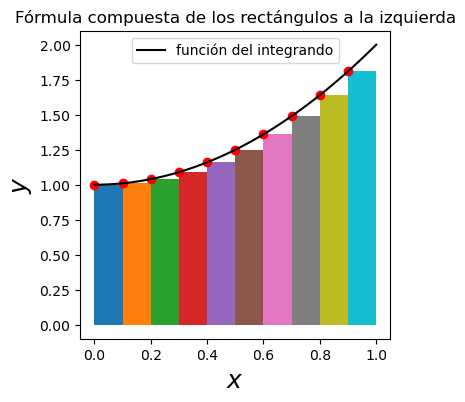

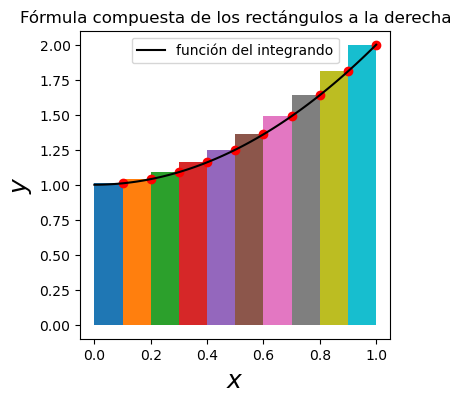

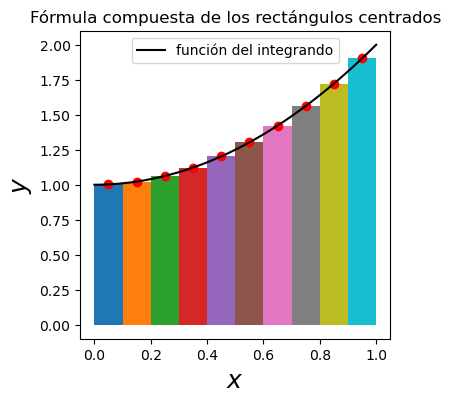

In [283]:
# Definimos la función y los extremos de integración
f = lambda x: x**2 + 1
a = 0
b = 1

n = 10 # Número de nodos

print(Title(f"Evaluación de la integral entre {a} y {b} de x²+1 respecto a x:"))

r_izq = formula_rectangulo_izquierda(f, a, b, n)
r_der = formula_rectangulo_derecha(f, a, b, n)
r_cent = formula_rectangulo_centrado(f, a, b, n)

print(f"\tEvaluación con rectángulo izquierda: {r_izq}")
print(f"\tEvaluación con rectángulo derecha: {r_der}")
print(f"\tEvaluación con rectángulo centrado: {r_cent}")

dibujar_rectangulos(f, a, b, "izquierda", n)
dibujar_rectangulos(f, a, b, "derecha", n)
dibujar_rectangulos(f, a, b, "centrado", n)


### Ejercicio 7

Implemente una función que calcule la integral de una función $f$ en el intervalo $[a,b]$ usando la fórmula de Simpson compuesta, parametrizando también el número de subintervalos utilizados (se premia la eficiencia). Represente gráficamente la fórmula de Simpson compuesta análogamente a la representación mostrada para la fórmula de los trapecios compuesta.

### Ejercicio 8

Realice una comparativa entre los errores cometidos al aproximar funciones potencias sucesivas $x^i$, con $i=1,2,3,\ldots$ en el intervalo $[0,1]$ mediante las fórmulas de los trapecios y de Simpson compuestas con diferentes valores de $h$; e inducir de ahí, los posibles órdenes de exactitud (a partir de los valores de $i$ que proporcionen valores exactos de la integral). No deje de tener en cuenta los posibles errores de redondeo, inevitables en todo cálculo realizado con ordenador.

### Ejercicio 9

### Ejercicio 10